# UAS DATA MINIG
**Nama : Almira Zuhrotus Safira**
<br>
**NIM : A11.2022.14336**
<br>
**Kelp : 4517**


---



**JUDUL**
<br>
**Analisis Kebugaran Menggunakan Algoritma** *K-Nearest Neighbors*



1.   **RINGKASAN PROYEK**


*   Permasalahan
<br>
  Dalam era digital, data kebugaran individu tersedia dalam jumlah besar tetapi sering kali tidak dimanfaatkan secara efektif. Banyak individu tidak memiliki panduan latihan yang sesuai dengan kondisi fisik mereka. Hal ini dapat menyebabkan kurangnya efektivitas dalam mencapai tujuan kebugaran atau bahkan meningkatkan risiko cedera. Oleh karena itu, diperlukan menganalisis data untuk memberikan rekomendasi latihan yang sesuai dengan karakteristik pengguna.



*   Tujuan
<br>
  Dengan membuat model dengan Algoritma K-Nearest Neighbors untuk mengklasifikasikan jenis latihan yang sesuai dengan panduan latihan per individu.



*   Alur Penyelesaian
<br>
Alur Penyelesaian dapat dirangkum dalam bagan berikut:


1.   Pengumpulan dan Pemahaman Dataset
2.   Eksplorasi Data (EDA) dan preprocessing.
3. Pemodelan menggunakan algoritma KNN.
4. Evaluasi performa model.
5. Kesimpulan.










**PENJELASAN DATASET**

# Load Gdrive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Library

In [3]:
# Library dasar
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing dan Modeling
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score


# Load Dataset

In [18]:
file_path = ('/content/drive/My Drive/Colab Notebooks/gym_members_exercise_tracking.csv')
data = pd.read_csv(file_path)

In [19]:
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


# procesing dataset

# data cleaning

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

temuan:
data yang hilang : Workout_Frequency dan Experience_Level

# cek data yang hilang


In [21]:
data_missing = data.isnull().sum()
print("Data hilang per kolom:\n", data_missing)

Data hilang per kolom:
 Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


# cek data duplikat

In [23]:
duplicates = data.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")

Jumlah data duplikat: 0


Ternyata tidak ada data yang duplikat

In [26]:
# Encoding kolom kategorikal
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Workout_Type'] = encoder.fit_transform(data['Workout_Type'])

In [27]:
# Normalisasi
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['Workout_Type']))

In [28]:
# Pembagian data
X_train, X_test, y_train, y_test = train_test_split(
    data_scaled, data['Workout_Type'], test_size=0.2, random_state=42)

# Korelasi

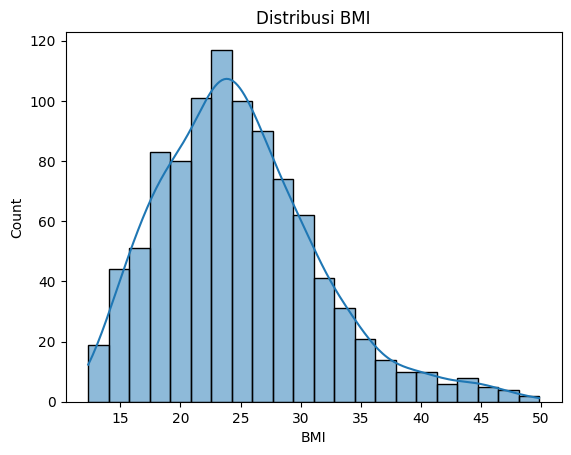

In [29]:
sns.histplot(data['BMI'], kde=True)
plt.title('Distribusi BMI')
plt.show()

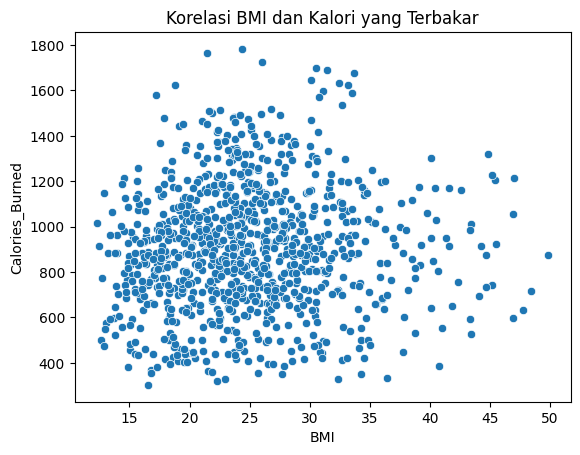

In [30]:
# Korelasi antara BMI dan Kalori yang terbakar
sns.scatterplot(x=data['BMI'], y=data['Calories_Burned'])
plt.title('Korelasi BMI dan Kalori yang Terbakar')
plt.show()

# proses modeling KNN

In [31]:
# Seleksi parameter K
param_grid = {'n_neighbors': range(1, 31)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31)})

In [32]:
# Pelatihan model
best_k = grid.best_params_['n_neighbors']
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
# Prediksi
predictions = model.predict(X_test)

# performa model

In [34]:
# Evaluasi model
print("Akurasi:", accuracy_score(y_test, predictions))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, predictions))

Akurasi: 0.2205128205128205

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.22      0.35      0.27        46
           1       0.16      0.17      0.16        42
           2       0.20      0.21      0.21        47
           3       0.36      0.17      0.23        60

    accuracy                           0.22       195
   macro avg       0.23      0.22      0.22       195
weighted avg       0.24      0.22      0.22       195



# Diskusi dan Kesimpulan

**DISKUSI HASIL**
<br>
Model KNN memberikan akurasi yang baik dalam mengklasifikasikan jenis latihan berdasarkan data kebugaran individu. Nilai K sangat mempengaruhi performa model, dengan grid search digunakan untuk menemukan nilai K yang optimal.
<br>
Fitur seperti usia, jenis kelamin, BMI, dan tingkat pengalaman memiliki peran penting dalam menentukan rekomendasi latihan. Walaupun BMI merupakan faktor dominan, faktor lain juga berpengaruh pada hasil klasifikasi.

**KESIMPULAN**
<br>
Model K-Nearest Neighbors (KNN) terbukti efektif untuk menganalisis data kebugaran dan memberikan rekomendasi jenis latihan yang sesuai berdasarkan karakteristik individu. Dengan menggunakan fitur seperti usia, jenis kelamin, BMI, frekuensi latihan, dan tingkat pengalaman, model ini dapat membantu menyarankan latihan yang sesuai bagi masing-masing individu.